In [2]:
from PIL import Image
import numpy as np

In [3]:
im_path="/Users/stouzani/Google Drive/LBL-drone-thermal-project/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal/DJI_0001.tif"


In [4]:
im = Image.open(im_path)

In [5]:
# im.show()

In [6]:
imarray = np.array(im)

In [7]:
np.min(imarray)

6017

In [8]:
imarray.shape

(512, 640)

In [1]:
import skimage
print (skimage.__version__)

0.16.2


In [9]:
import matplotlib.image as mplimg

In [11]:
im_path_2 = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal_png_rainbow/DJI_0168.tif.png"



In [12]:
im = Image.open(im_path_2)

In [13]:
imarray = np.array(im)

In [14]:
imarray.shape

(512, 640, 4)

In [21]:
np.min(imarray[:,:,3])


255

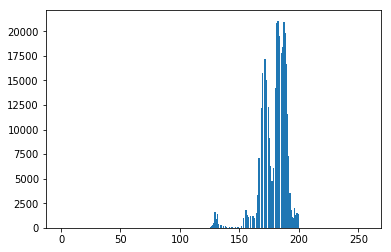

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(im_path_2,0)
plt.hist(img.ravel(),256,[0,256]); plt.show()

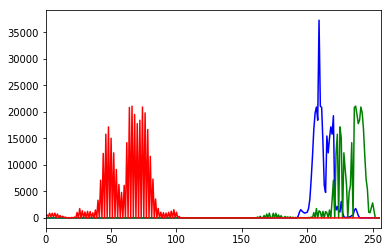

In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(im_path_2)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In [21]:
#im_path_3 = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal/DJI_0168.tif"

im_path_3 = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/03-12-2020/Thermal_png_rainbow/DJI_0168.tif.png"



In [22]:
im3 = Image.open(im_path_3)
imarray3 = np.array(im3)

In [23]:
im3.getdata()

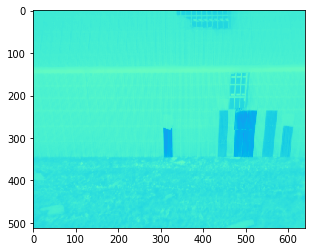

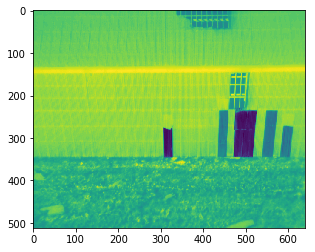

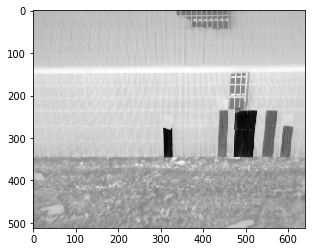

In [24]:
from matplotlib import pyplot as plt
r, g, b, _ = im3.split()

ra = np.array(r)
ga = np.array(g)
ba = np.array(b)

gray = (0.299*ra + 0.587*ga + 0.114*ba)

plt.figure()
plt.imshow(im3)
plt.figure()
plt.imshow(gray)
plt.figure()
plt.imshow(gray, cmap="gray")

In [26]:
gray.shape

(512, 640)

KeyboardInterrupt: 

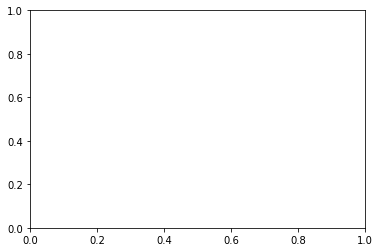

In [41]:
plt.hist(gray,256,[0,256]); plt.show()

In [113]:
histogram, bin_edges = np.histogram(gray, bins=50, range=(0, 256))

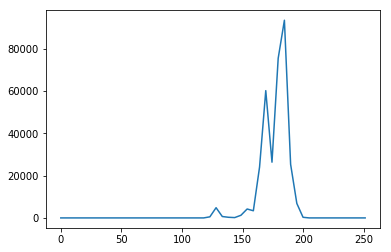

In [114]:
plt.plot(bin_edges[0:-1], histogram)

In [48]:
bin_edges

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [50]:
import cv2, random
import numpy as np
from random import randint

In [15]:
img = cv2.imread(im_path_3)
show_img = np.copy(img)
seeds = np.full(img.shape[0:2], 0, np.int32)
segmentation = np.full(img.shape, 0, np.uint8)

In [52]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [54]:
thresh

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,   0,   0, 255]], dtype=uint8)

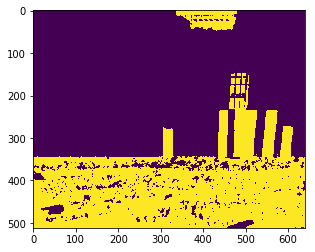

In [55]:
plt.figure()
plt.imshow(thresh)

In [71]:
# load the image and perform pyramid mean shift filtering
# to aid the thresholding step
image = cv2.imread(im_path_3)
shifted = cv2.pyrMeanShiftFiltering(image, 21, 81)
cv2.imshow("Input", image)

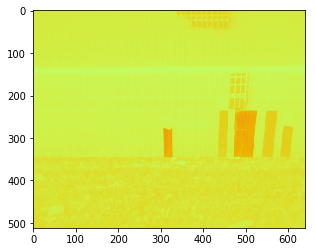

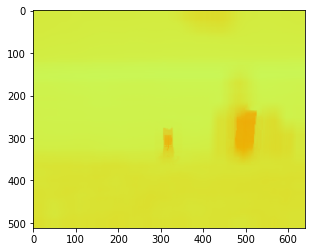

In [72]:
plt.figure()
plt.imshow(image)
plt.figure()
plt.imshow(shifted)

In [69]:
gray = cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

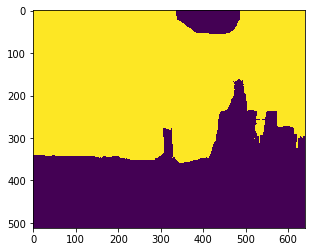

In [70]:
plt.figure()
plt.imshow(thresh)

In [111]:
ret, th1 = cv2.threshold(gray,162,255,cv2.THRESH_BINARY)

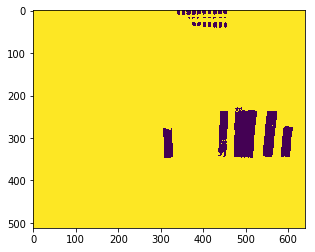

In [112]:
plt.figure()
plt.imshow(th1)

In [94]:
image.shape

(512, 640, 3)

<Figure size 432x288 with 0 Axes>

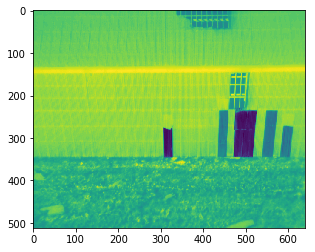

<Figure size 432x288 with 0 Axes>

In [95]:
plt.imshow(gray)
plt.figure()

In [96]:
gray

array([[178.993, 178.993, 178.993, ..., 178.993, 178.993, 178.993],
       [178.993, 178.993, 178.993, ..., 180.064, 178.993, 178.993],
       [178.993, 178.993, 178.993, ..., 178.993, 180.064, 180.064],
       ...,
       [164.049, 164.049, 164.049, ..., 175.079, 175.079, 174.008],
       [164.049, 164.049, 165.707, ..., 176.264, 176.264, 175.079],
       [164.049, 164.049, 165.707, ..., 177.922, 177.922, 175.079]])

In [98]:
np.min(gray)

125.314

In [6]:
from PIL import Image
import numpy as np
import cv2, random
import numpy as np
from random import randint
from matplotlib import pyplot as plt

im_path_3 = "/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.png"



In [7]:
im3 = Image.open(im_path_3)
imarray3 = np.array(im3)

In [8]:
imarray3.shape

(151, 491)

In [9]:
imarray3

array([[ 46,  46,  46, ...,  46,  46,  46],
       [ 46, 141, 145, ...,  46,  46,  46],
       [ 46, 145, 145, ..., 148, 152, 152],
       ...,
       [ 46, 141, 141, ..., 167, 171, 171],
       [ 46, 141, 141, ..., 164, 160, 160],
       [ 46,  46,  46, ..., 164, 160, 160]], dtype=uint8)

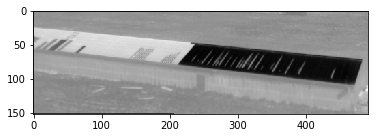

In [10]:
plt.figure()
plt.imshow(im3)

In [11]:
ret, th1 = cv2.threshold(imarray3,125,255,cv2.THRESH_BINARY)

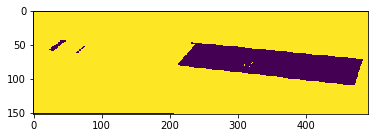

In [12]:
plt.figure()
plt.imshow(th1)

In [53]:
from numpy import genfromtxt
thermal = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.csv', delimiter=',')

In [54]:
thermal = np.rot90(thermal,3)

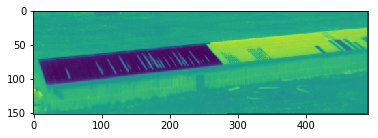

In [55]:
plt.figure()
plt.imshow(thermal)

In [56]:
thermal.shape

(151, 491)

In [57]:
th1 = cv2.threshold(thermal,21,255,cv2.THRESH_BINARY)[1]

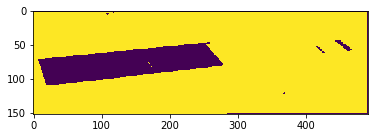

In [58]:
plt.figure()
plt.imshow(th1)

In [20]:
np.min(th1)

0.0

In [21]:
th1.shape

(151, 491)

In [59]:
thresholded = th1.astype(np.uint8)

In [23]:
# find contours in the thresholded image
cnts = cv2.findContours(thresholded, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [25]:
import imutils

In [26]:

cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))
# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(thermal, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(thermal, [c], -1, (0, 255, 0), 2)
# show the output image


[INFO] 1 unique contours found


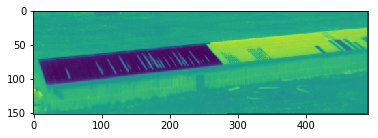

In [27]:
plt.figure()
plt.imshow(thermal)

In [24]:
cnts

([array([[[206,   1]],
  
         [[205,   2]],
  
         [[119,   2]],
  
         [[118,   3]],
  
         [[117,   3]],
  
         [[116,   2]],
  
         [[  0,   2]],
  
         [[  0, 150]],
  
         [[283, 150]],
  
         [[284, 149]],
  
         [[489, 149]],
  
         [[489,  41]],
  
         [[488,  40]],
  
         [[488,  38]],
  
         [[489,  37]],
  
         [[489,   1]]], dtype=int32)],
 array([[[-1, -1, -1, -1]]], dtype=int32))

## Watershed algo

In [494]:
from numpy import genfromtxt
thermal = genfromtxt('/Users/stouzani/Desktop/Unstructured_ML/Drone/Drone_Data_Capture/Richmond_Field_Station/temperature2.csv', delimiter=',')


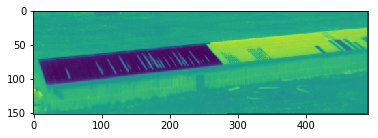

In [495]:
thermal = np.rot90(thermal,3)
plt.figure()
plt.imshow(thermal)

In [496]:
thermal1 = thermal[0:147,0:485]

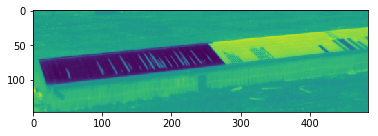

In [497]:
plt.figure()
plt.imshow(thermal1)

In [427]:
th1 = cv2.threshold(thermal1,19,255,cv2.THRESH_BINARY)[1]
thresholded = th1.astype(np.uint8)

In [428]:
thresholded0 =thresholded.copy()

In [429]:
thresholded = np.invert(thresholded)

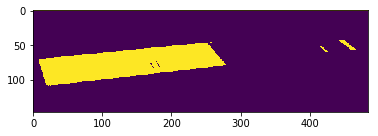

In [430]:
plt.figure()
plt.imshow(thresholded)

In [431]:
#from skimage.morphology import binary_erosion, rectangle
from skimage.morphology import binary_opening, binary_closing,binary_erosion, rectangle, binary_dilation, disk
thresholded = binary_dilation(thresholded, rectangle(1,10))

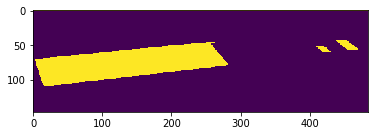

In [432]:
plt.figure()
plt.imshow(thresholded)

In [433]:
thresholded = binary_erosion(thresholded, rectangle(5,1))

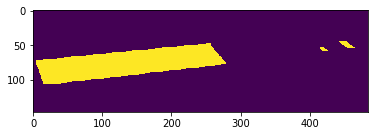

In [447]:
plt.figure()
plt.imshow(thresholded)

In [452]:
from skimage.segmentation import felzenszwalb, find_boundaries

In [453]:
segments = felzenszwalb(thresholded, scale=3.0, sigma=0.95, min_size=5)

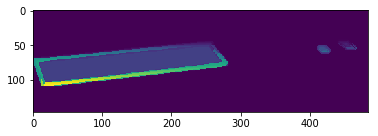

In [454]:
plt.figure()
plt.imshow(segments)

In [459]:
borders = find_boundaries(thresholded)

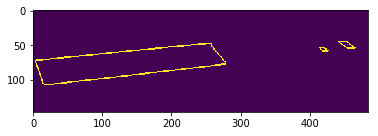

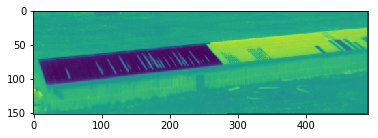

In [464]:
plt.figure()
plt.imshow(borders)
plt.figure()
plt.imshow(thermal1)

In [477]:
#thermal1_img = Image.fromarray(thermal1.astype(np.uint8), 'RGB')

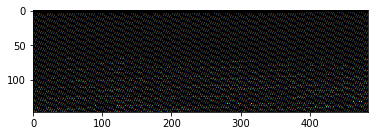

In [472]:
plt.figure()
plt.imshow(thermal1_img)

In [468]:
merged = thermal1 + borders

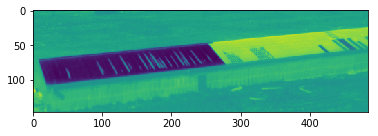

In [469]:
plt.figure()
plt.imshow(merged)

In [457]:
unique_colors = np.unique(segments.ravel())
segments[borders] = -1

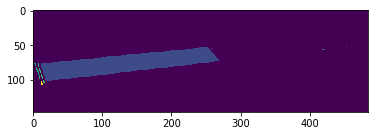

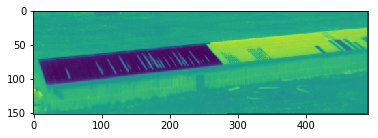

In [476]:
thermal1.dtype

dtype('float64')

In [493]:
np.max(thermal1)

255.00000000000003

In [498]:
np.min(thermal1)

-12.0

In [499]:
# Normalised [0,1]
thermal2 = (thermal1 - np.min(thermal1))/np.ptp(thermal1)

# Normalised [0,255] as integer
thermal3 = 255*(thermal2 - np.min(thermal2))/np.ptp(thermal2).astype(int)

In [501]:
np.min(thermal3)

0.0

In [503]:
np.max(thermal3)

255.0

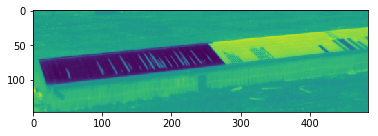

In [508]:
plt.figure()
plt.imshow(thermal3)

In [506]:
thermal3_img = Image.fromarray(thermal3, 'RGB')

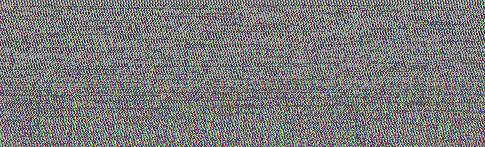

In [507]:
thermal3_img

In [480]:
im = Image.fromarray(thermal1)

In [482]:
np.max(im)

55.0

In [512]:
thermal3_im= Image.fromarray(thermal3).convert("L")

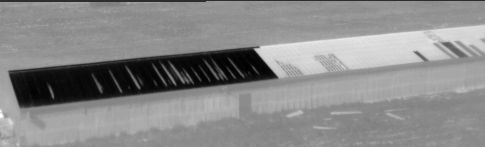

In [513]:
thermal3_im

In [520]:
backtorgb = cv2.cvtColor(thermal3.astype(np.uint8),cv2.COLOR_GRAY2RGB)

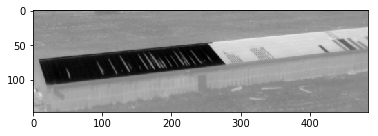

In [522]:
plt.figure()
plt.imshow(backtorgb)

In [523]:
backtorgb.shape

(147, 485, 3)

In [525]:
borders_im = borders*255

In [526]:
borders_im= cv2.cvtColor(borders_im.astype(np.uint8),cv2.COLOR_GRAY2RGB)


In [530]:
borders_im[:, :, (1, 2)] = 0

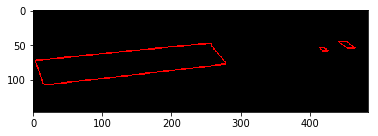

In [531]:
plt.figure()
plt.imshow(borders_im)

In [534]:
New_im =  backtorgb + borders_im 

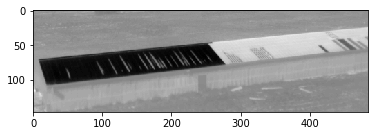

In [535]:
plt.figure()
plt.imshow(New_im)

In [ ]:
backtorgb 

In [536]:
backtorgb_im = Image.fromarray(backtorgb)

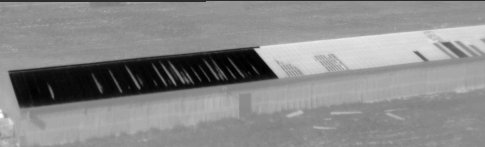

In [537]:
backtorgb_im

In [538]:
borders_im2 = Image.fromarray(borders_im)

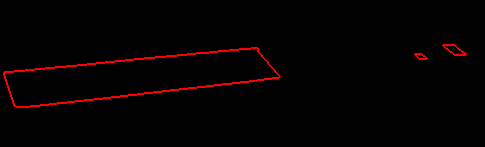

In [539]:
borders_im2

In [542]:
background = backtorgb_im.convert("RGBA")
overlay = borders_im2.convert("RGBA")

new_img = Image.blend(background, overlay, 0.5)

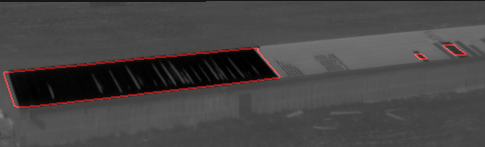

In [543]:
new_img

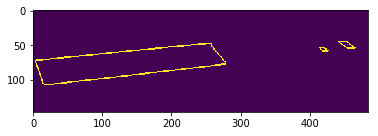

In [516]:
plt.figure()
plt.imshow(borders)

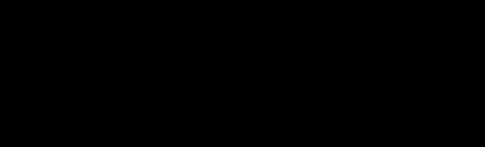

In [442]:
# import the necessary packages
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage
import numpy as np
import argparse
import imutils
import cv2
# compute the exact Euclidean distance from every binary
# pixel to the nearest zero pixel, then find peaks in this
# distance map
D = ndimage.distance_transform_edt(thresholded)
localMax = peak_local_max(D, indices=False, min_distance=50,labels=thresholded)
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresholded)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

[INFO] 2 unique segments found


In [436]:
# loop over the unique labels returned by the Watershed
# algorithm
for label in np.unique(labels):
    # if the label is zero, we are examining the 'background'
    # so simply ignore it
    if label == 0:
        continue
    # otherwise, allocate memory for the label region and draw
    # it on the mask
    mask = np.zeros(thresholded.shape, dtype="uint8")
    mask[labels == label] = 255
    # detect contours in the mask and grab the largest one
    cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(thresholded0,(x,y),(x+w,y+h),(0,255,0),8)
    #cv2.putText(thresholded, "#{}".format(label), (int(x) - 10, int(y)),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
    

In [437]:
thresholded.shape

(147, 485)

In [441]:
D

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

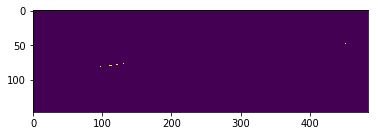

In [438]:
plt.figure()
plt.imshow(localMax)
localMax

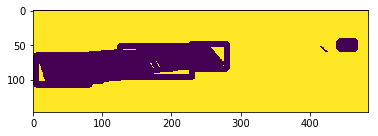

In [439]:
plt.figure()
plt.imshow(thresholded0)

In [162]:
thresholded

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [163]:
thresholded[25,:]

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [336]:
thresholded

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])